Import Necessary Packages and Classes from Other Files 

In [2]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from Channel import Channel
from beam_gen import BeamGen
from simulation import Simulation 

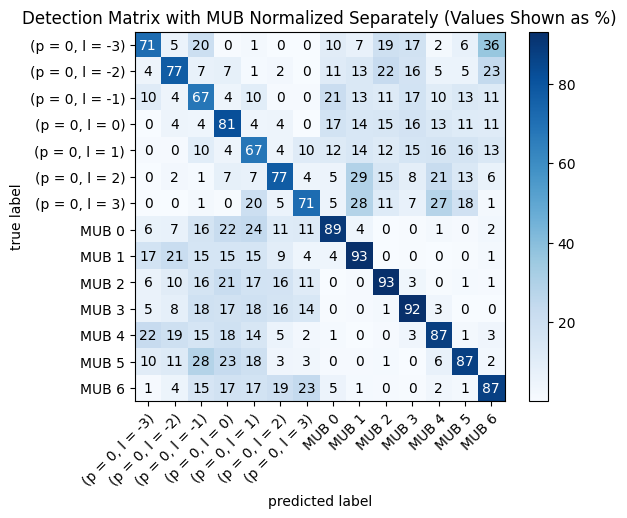

In [6]:
beamWaist = 2  # Define beam waist of 2 mm

sim = Simulation(L=10 * beamWaist, N=1000, wavelength=810E-6, units="mm")
sim.add_beam_gen(ell=-3, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=-2, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=-1, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=1, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=2, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=3, p=0, beam_waist=beamWaist)


sim.add_channel(type=Channel.FREE_SPACE, dist=100E3)
sim.add_channel(type = Channel.ABBARATION, n = [3, 1, 4], m = [1, 1, 2], stre = np.array([0.9, 0.9, 0.9]), app = 3*beamWaist)
sim.add_channel(type = Channel.FREE_SPACE, dist = 10E3) 

sim.run(use_mub=True)

channel_idx = 3

sim.plot_detection_matrix(channel_idx, separate_mub=True)


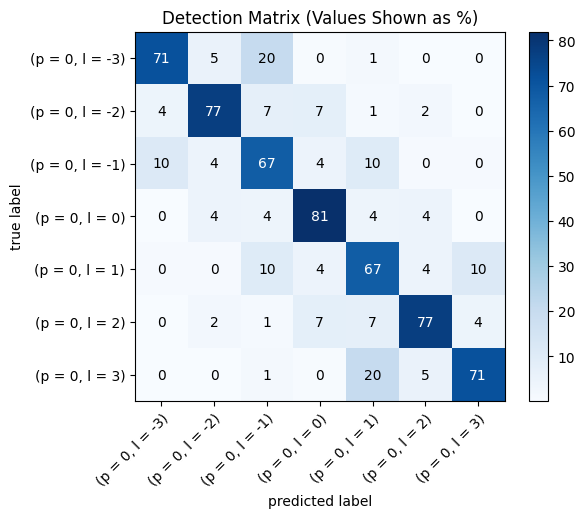

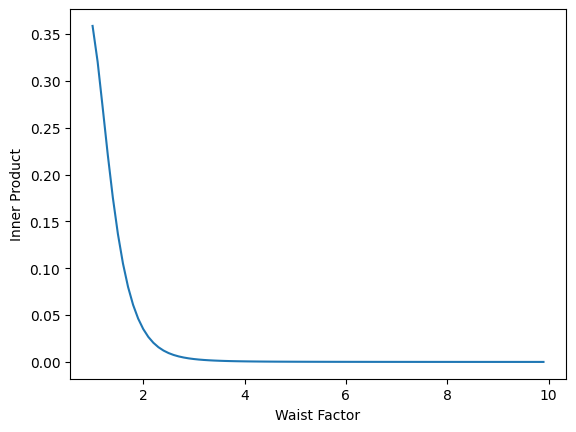

In [16]:
beamWaist = 2E-3  # Define beam waist of 2 mm

sim = Simulation(L=10 * beamWaist, N=1000, wavelength=810E-9)
sim.add_beam_gen(ell=-3, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=-2, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=-1, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=1, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=2, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=3, p=0, beam_waist=beamWaist)

sim.add_channel(type=Channel.FREE_SPACE, dist=100)
sim.add_channel(type = Channel.ABBARATION, n = [3, 1, 4], m = [1, 1, 2], stre = np.array([0.9, 0.9, 0.9]), app = 3*beamWaist)
sim.add_channel(type = Channel.FREE_SPACE, dist = 10) 

sim.run()

# Observe affect of changing waist param of measurement basis
waist_factor = np.arange(1, 10, 0.1)

inner_products = np.zeros(len(waist_factor))

sim.plot_detection_matrix(channel_idx)

for i in range(len(waist_factor)):
    sim.add_measurement_basis(ell=-3, p=0, beam_waist=waist_factor[i]*beamWaist)
    inner_products[i] = sim.compute_inner_product(0, 0, channel_index_1=channel_idx, use_measurement_basis_for_2=True)
    sim.delete_measurement_basis()

plt.plot(waist_factor, inner_products)
plt.xlabel("Waist Factor")
plt.ylabel("Inner Product")
plt.show()


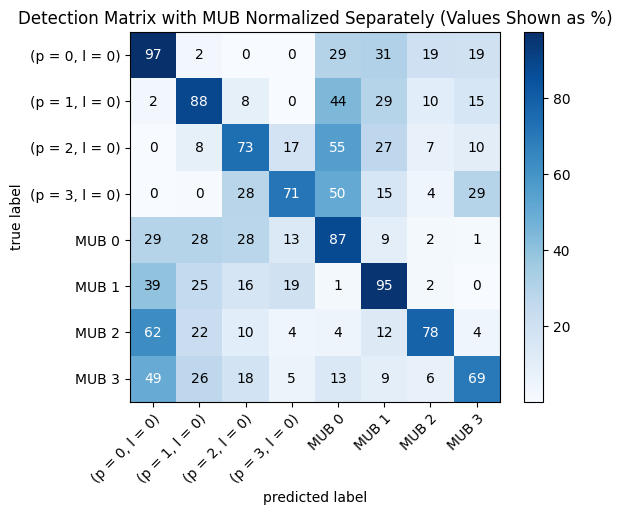

In [20]:
beamWaist = 2E-3  # Define beam waist of 2 mm

sim = Simulation(L=10 * beamWaist, N=1000, wavelength=810E-9)
sim.add_beam_gen(ell=0, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=1, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=2, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=3, beam_waist=beamWaist)

sim.add_channel(type=Channel.FREE_SPACE, dist=100)
sim.add_channel(type=Channel.ABBARATION, n=[3, 1, 4], m=[1, 1, 2], stre=np.array([0.9, 0.9, 0.9]), app=3*beamWaist)
sim.add_channel(type=Channel.FREE_SPACE, dist=10)

sim.run(use_mub = True)

channel_idx = 3

sim.plot_detection_matrix(channel_idx, separate_mub = True)

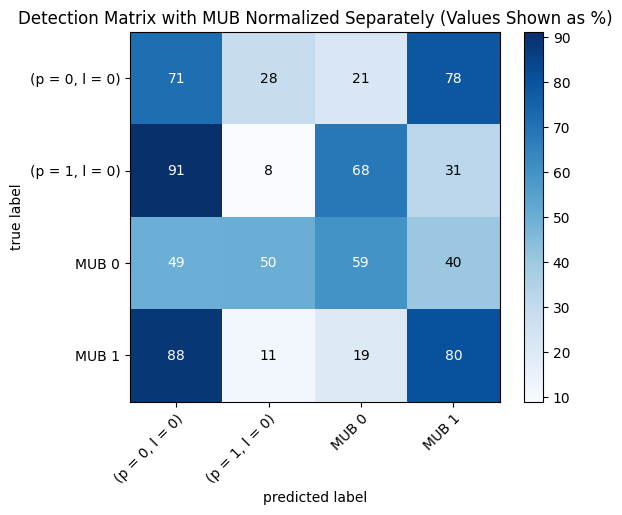

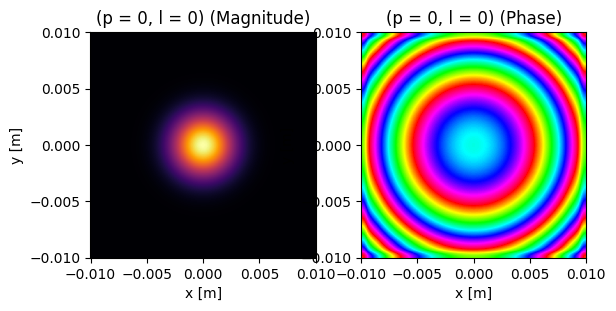

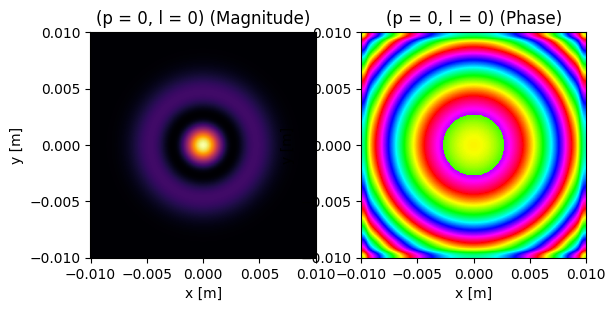

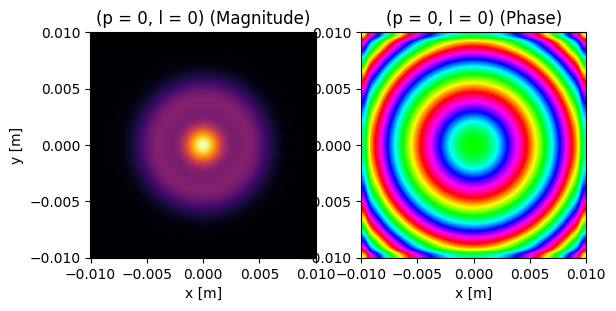

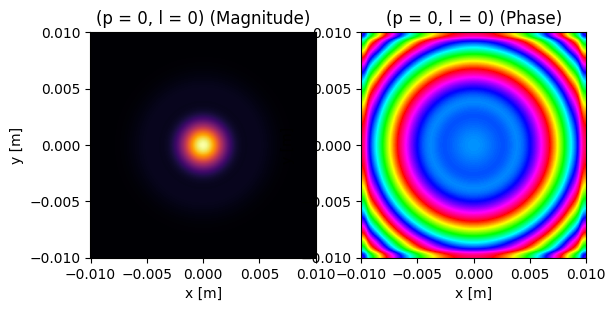

In [5]:
beamWaist = 2E-3  # Define beam waist of 2 mm

sim = Simulation(L=10 * beamWaist, N=1000, wavelength=810E-9)
sim.add_beam_gen(ell=0, p=0, beam_waist=beamWaist)
sim.add_beam_gen(ell=0, p=1, beam_waist=beamWaist)
#sim.add_beam_gen(ell=0, p=2, beam_waist=beamWaist)
#sim.add_beam_gen(ell=0, p=3, beam_waist=beamWaist)

sim.add_channel(type=Channel.FREE_SPACE, dist=1000)
sim.add_channel(type=Channel.ABBARATION, n=[3, 1, 4], m=[1, 1, 2], stre=np.array([0.9, 0.9, 0.9]), app=3*beamWaist)
sim.add_channel(type=Channel.FREE_SPACE, dist=10)

sim.run(use_mub = True)

channel_idx = 1

sim.plot_detection_matrix(channel_idx, separate_mub = True)
sim.plot_beams(channel_index = channel_idx, run_indices = [0])
sim.plot_beams(channel_index = channel_idx, run_indices = [1])
sim.plot_beams(channel_index = channel_idx, run_indices = [2])
sim.plot_beams(channel_index = channel_idx, run_indices = [3])
